In [54]:
#STEP 1: LOAD DATASET
from google.colab import files
uploaded = files.upload ()

import pandas as pd

#load file csv
df = pd.read_csv('/content/netflix_titles.csv')

#tampilkan 5 baris pertama
df.head()

#STEP 2: EKSPLORASI AWAL DATASET
#ukuran data
print("ukuran data:", df.shape)

#info kolom dan tipe data
df.info()

#cek jumlah nilai null per kolom
print("\njumlah nilai kosong:")
print(df.isnull().sum())

#STEP 3: PEMBERSIHAN DATA (DATA CLEANING)
#buat salinan data agar data asli tetap utuh
df_clean = df.copy()

#ubah nama kolom jadi lowercase dan ganti spasi dengan garis bawah
df_clean.columns = df_clean.columns.str.lower().str.replace(' ', '_')

#hapus baris dengan title, type, atau release_year kosong (penting untuk analisis
df_clean = df_clean.dropna(subset=['title', 'type', 'release_year'])

#cek ulang hasil pembersihan
df_clean.info()

Saving netflix_titles.csv to netflix_titles (20).csv
ukuran data: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

jumlah nilai kosong:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
releas

/tmp/ipython-input-1888267133.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_clean, x='type', palette='Set2')


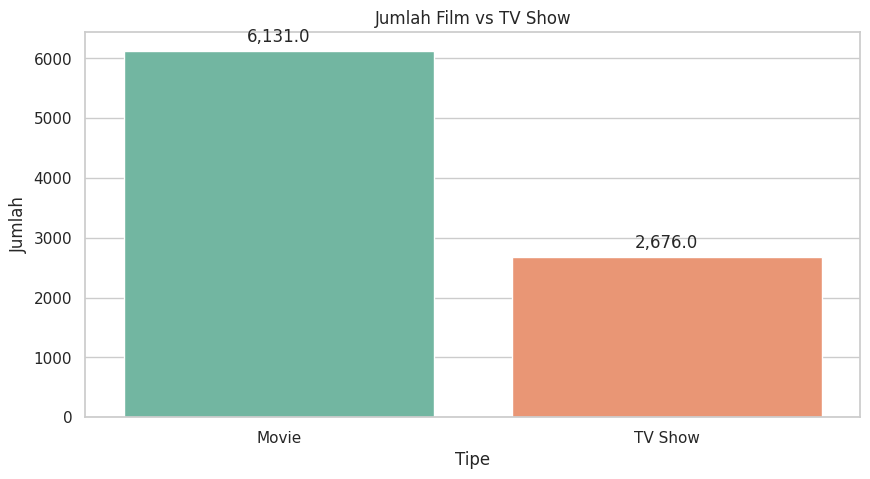

/tmp/ipython-input-1888267133.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_ratings.values, y=top_ratings.index, palette='rocket')


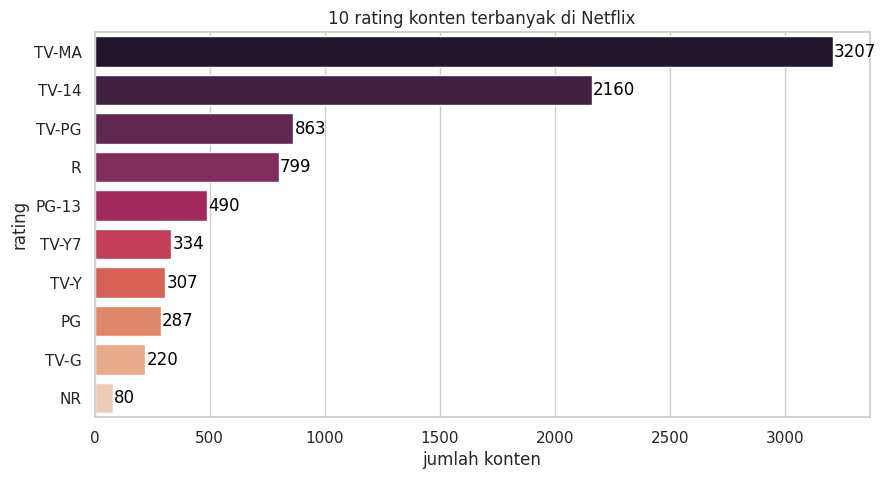

/tmp/ipython-input-1888267133.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')


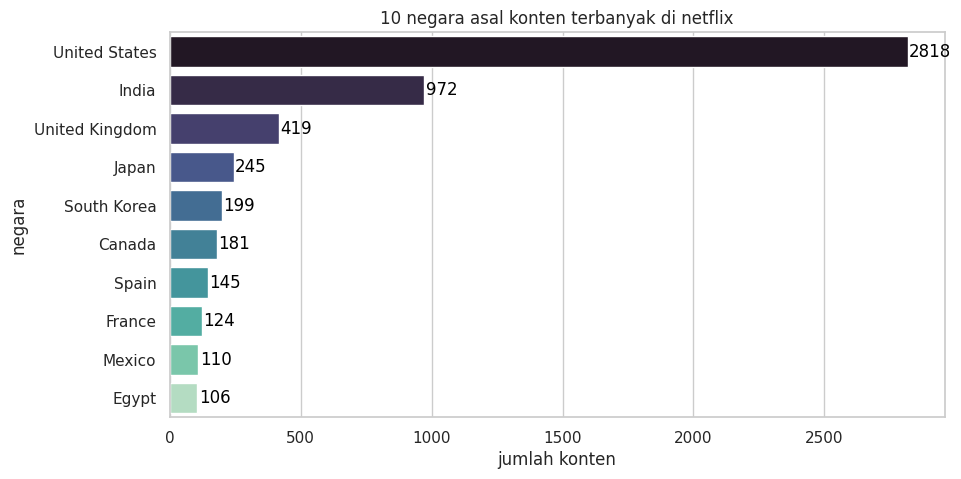

/tmp/ipython-input-1888267133.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_movie_countries.values, y=top_movie_countries.index, palette='Blues_d')
/tmp/ipython-input-1888267133.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tv_countries.values, y=top_tv_countries.index, palette='Greens_d')


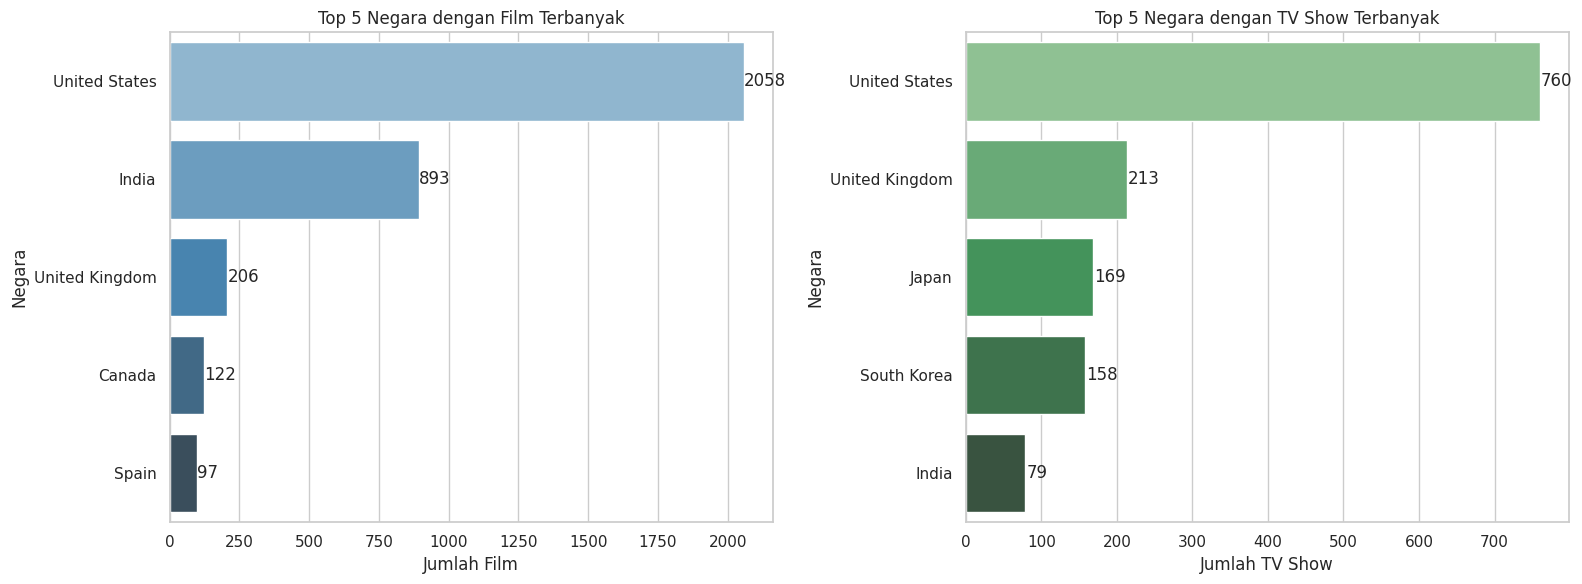

In [55]:
#STEP 4: VISUALISASI DATA
import matplotlib.pyplot as plt
import seaborn as sns

#Perbandingan Jumlah Film vs TV Show
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_clean, x='type', palette='Set2')

#tambahkan angka diatas bar
for p in ax.patches:
  ax.annotate(format(p.get_height(), ','),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.title('Jumlah Film vs TV Show')
plt.xlabel('Tipe')
plt.ylabel('Jumlah')
plt.show()

#Rating Konten terbanyak
top_ratings = df_clean['rating'].value_counts().head(10)
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=top_ratings.values, y=top_ratings.index, palette='rocket')

#tambahkan angka
for i, v in enumerate(top_ratings.values):
    ax.text(v + 5, i, str(v), color='black', va='center')

plt.title('10 rating konten terbanyak di Netflix')
plt.xlabel('jumlah konten')
plt.ylabel('rating')
plt.show()

#Negara Asal Konten Terbanyak (Top 10)
top_countries = df_clean['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
ax = sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')

#tambahkan angka
for i, v in enumerate(top_countries.values):
    ax.text(v + 5, i, str(v), color='black', va='center')

plt.title('10 negara asal konten terbanyak di netflix')
plt.xlabel('jumlah konten')
plt.ylabel('negara')
plt.show()

#pisahkan data berdasarkan tipe
movie = df_clean[df_clean['type']== 'Movie']
tv_shows = df_clean[df_clean['type'] == 'TV Show']

#hitung 5 negara terbanyak untuk masing-masing tipe
top_movie_countries = movie['country'].dropna().value_counts().head(5)
top_tv_countries = tv_shows['country'].dropna().value_counts().head(5)

plt.figure(figsize=(16, 6))

#visualize untuk film
plt.subplot(1, 2, 1)  # subplot baris 1 kolom 2 posisi 1
sns.barplot(x=top_movie_countries.values, y=top_movie_countries.index, palette='Blues_d')
plt.title('Top 5 Negara dengan Film Terbanyak')
plt.xlabel('Jumlah Film')
plt.ylabel('Negara')

# Tambahkan label angka pada batang
for i, value in enumerate(top_movie_countries.values):
    plt.text(value + 1, i, str(value), va='center')

# Visualisasi untuk TV Show
plt.subplot(1, 2, 2)  # subplot baris 1 kolom 2 posisi 2
sns.barplot(x=top_tv_countries.values, y=top_tv_countries.index, palette='Greens_d')
plt.title('Top 5 Negara dengan TV Show Terbanyak')
plt.xlabel('Jumlah TV Show')
plt.ylabel('Negara')

# Tambahkan label angka pada batang
for i, value in enumerate(top_tv_countries.values):
    plt.text(value + 1, i, str(value), va='center')

plt.tight_layout()
plt.show()

/tmp/ipython-input-3610984734.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movie_counts, y=movie_labels, palette='Set2')


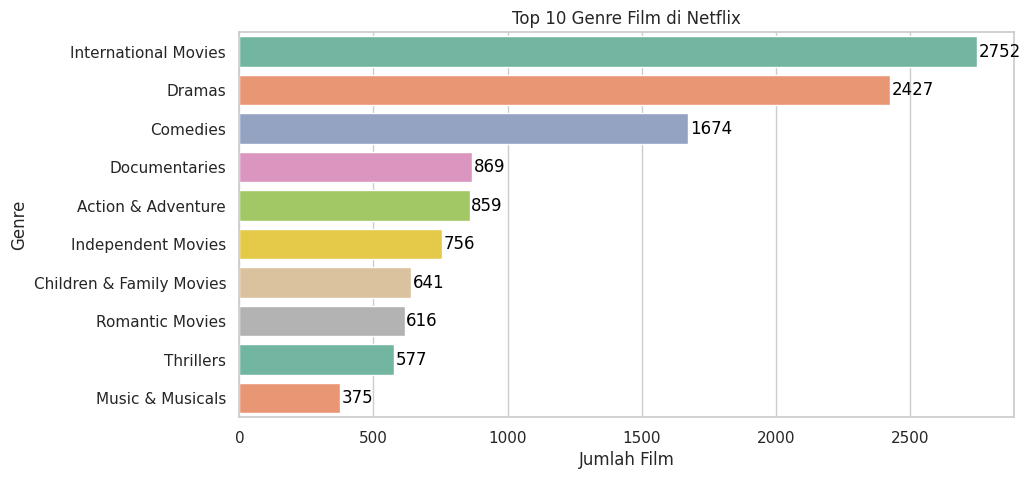

/tmp/ipython-input-3610984734.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tv_counts, y=tv_labels, palette='Set1')


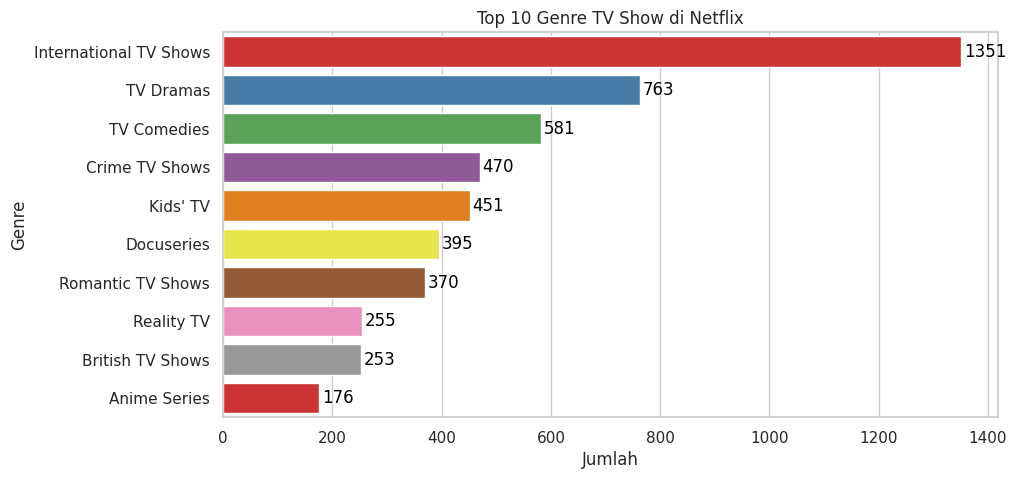

In [47]:
#Plot movie genres
plt.figure(figsize=(10, 5))
sns.barplot(x=movie_counts, y=movie_labels, palette='Set2')
#tambahkan angka diujung bar (jumlah konten)
for i, v in enumerate(movie_counts):
  plt.text(v + 5, i, str(v), color='black', va='center')

plt.title('Top 10 Genre Film di Netflix')
plt.xlabel('Jumlah Film')
plt.ylabel('Genre')
plt.show()

#Plot TV Show genres
plt.figure(figsize=(10, 5))
sns.barplot(x=tv_counts, y=tv_labels, palette='Set1')
#tambahkan angka diujung bar (jumlah konten)
for i, v in enumerate(tv_counts):
  plt.text(v + 5, i, str(v), color='black', va='center')

plt.title('Top 10 Genre TV Show di Netflix')
plt.xlabel('Jumlah')
plt.ylabel('Genre')
plt.show()

/tmp/ipython-input-1006877965.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')


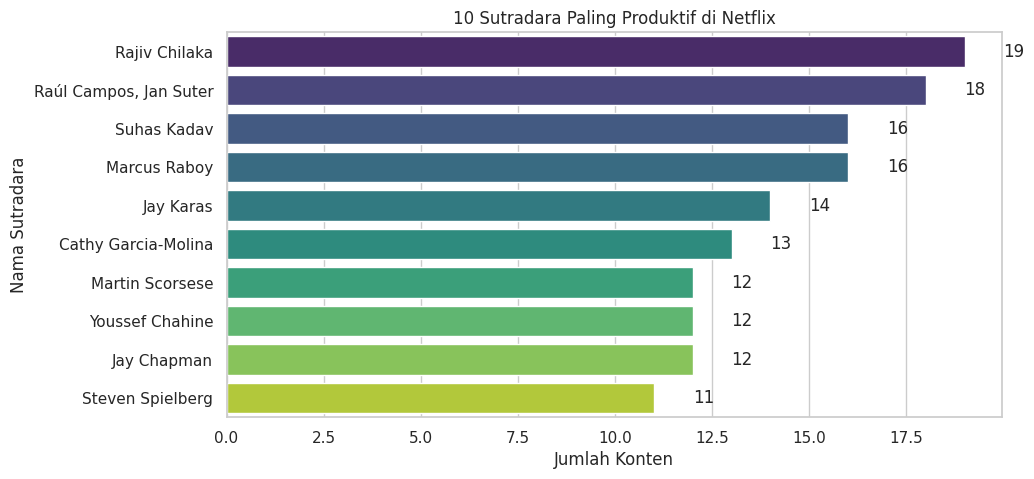

In [42]:
#Hitung jumlah konten per sutradara
top_directors = df_clean['director'].dropna().value_counts().head(10)

#Visualisasikan dengan seaborn
plt.figure(figsize=(10,5))
ax = sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')

#tambahkan label angka di setiap batang
for i, value in enumerate (top_directors.values):
  plt.text(value + 1, i, str(value), va='center')

plt.title('10 Sutradara Paling Produktif di Netflix')
plt.xlabel('Jumlah Konten')
plt.ylabel('Nama Sutradara')
plt.show()
